In [1]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c01913e29f6fef24b50b284a745d9e8714354141a3e401baaca7e0287cb7ef99
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"veerendranadhvallepu","key":"1e9a7d808f93963b851766f7449509cf"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!pip install -q kaggle

In [5]:
!kaggle datasets download andrewmvd/ocular-disease-recognition-odir5k

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k
License(s): other


In [6]:
!unzip /content/ocular-disease-recognition-odir5k.zip

Streaming output truncated to the last 5000 lines.
  inflating: preprocessed_images/2179_left.jpg  
  inflating: preprocessed_images/2179_right.jpg  
  inflating: preprocessed_images/217_left.jpg  
  inflating: preprocessed_images/217_right.jpg  
  inflating: preprocessed_images/2180_left.jpg  
  inflating: preprocessed_images/2180_right.jpg  
  inflating: preprocessed_images/2181_left.jpg  
  inflating: preprocessed_images/2181_right.jpg  
  inflating: preprocessed_images/2182_left.jpg  
  inflating: preprocessed_images/2182_right.jpg  
  inflating: preprocessed_images/2183_left.jpg  
  inflating: preprocessed_images/2183_right.jpg  
  inflating: preprocessed_images/2184_left.jpg  
  inflating: preprocessed_images/2184_right.jpg  
  inflating: preprocessed_images/2185_left.jpg  
  inflating: preprocessed_images/2185_right.jpg  
  inflating: preprocessed_images/2187_left.jpg  
  inflating: preprocessed_images/2187_right.jpg  
  inflating: preprocessed_images/2189_left.jpg  
  inflating

In [7]:
import os

def get_file_list(directory):
  """
  Returns a list of all files in the given directory.
  """
  file_list = []
  for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
      file_list.append(filename)
  return file_list

image_files1 = set(get_file_list('/content/ODIR-5K/ODIR-5K/Testing Images'))
image_files2 = set(get_file_list('/content/ODIR-5K/ODIR-5K/Training Images'))



In [8]:
print(len(image_files1))
print(len(image_files2))

1000
7000


In [9]:
import pandas as pd

df = pd.read_csv('/content/full_df.csv')
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [10]:
df.shape

(6392, 19)

In [11]:
len(df)

6392

In [12]:
for index, row in df.iterrows():
  left_fundus = row['Left-Fundus']
  right_fundus = row['Right-Fundus']

  if left_fundus in image_files1:
    df.at[index, 'Left-Fundus'] = '/content/ODIR-5K/ODIR-5K/Testing Images/' + left_fundus
  elif left_fundus in image_files2:
    df.at[index, 'Left-Fundus'] = '/content/ODIR-5K/ODIR-5K/Training Images/' + left_fundus
  else:
    print(left_fundus)

  if right_fundus in image_files1:
    df.at[index, 'Right-Fundus'] = '/content/ODIR-5K/ODIR-5K/Testing Images/' + right_fundus
  elif right_fundus in image_files2:
    df.at[index, 'Right-Fundus'] = '/content/ODIR-5K/ODIR-5K/Training Images/' + right_fundus
  else:
    print(right_fundus)

In [13]:
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,/content/ODIR-5K/ODIR-5K/Training Images/0_lef...,/content/ODIR-5K/ODIR-5K/Training Images/0_rig...,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,/content/ODIR-5K/ODIR-5K/Training Images/1_lef...,/content/ODIR-5K/ODIR-5K/Training Images/1_rig...,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,/content/ODIR-5K/ODIR-5K/Training Images/2_lef...,/content/ODIR-5K/ODIR-5K/Training Images/2_rig...,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,/content/ODIR-5K/ODIR-5K/Training Images/4_lef...,/content/ODIR-5K/ODIR-5K/Training Images/4_rig...,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,/content/ODIR-5K/ODIR-5K/Training Images/5_lef...,/content/ODIR-5K/ODIR-5K/Training Images/5_rig...,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


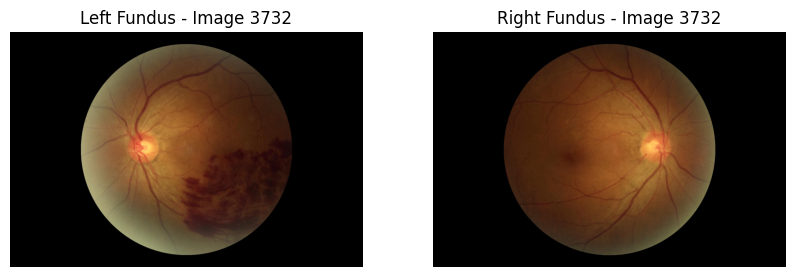

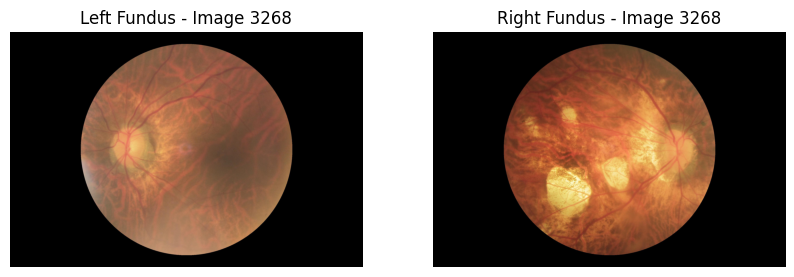

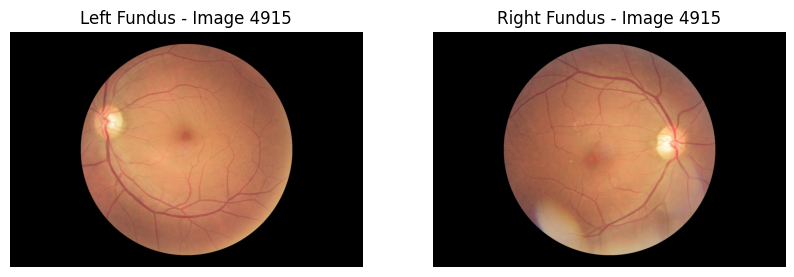

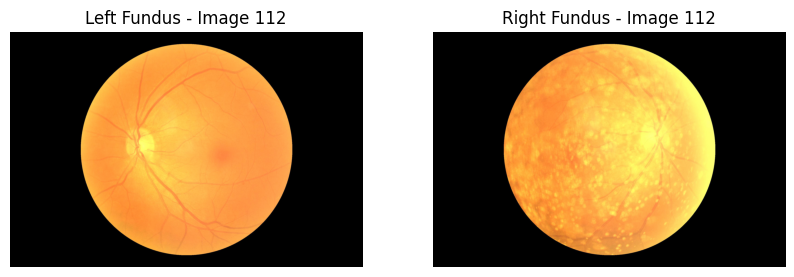

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
# Assuming df is already populated as in your previous code
for index in range(4):
  random_index = random.randint(0, len(df) - 1)
  left_fundus_path = df.iloc[random_index]['Left-Fundus']
  right_fundus_path = df.iloc[random_index]['Right-Fundus']

  try:
    left_img = mpimg.imread(left_fundus_path)
    right_img = mpimg.imread(right_fundus_path)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(left_img)
    axes[0].set_title(f"Left Fundus - Image {random_index+1}")
    axes[0].axis('off')

    axes[1].imshow(right_img)
    axes[1].set_title(f"Right Fundus - Image {random_index+1}")
    axes[1].axis('off')
    plt.show()

  except FileNotFoundError:
    print(f"Error: Image files not found for index {random_index}. Check paths.")
  except Exception as e:
    print(f"An error occurred for image {index+1}: {e}")


# """
# Multi-Modal Ocular Disease Classification with Explainable AI
#Dataset Columns: [ID, Patient Age, Patient  Sex, Left/Right-Fundus images, N,D,G,C,A,H, M,O]
# """

# importing Libraries

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import shap
from lime import lime_image

# Constants

In [16]:
!mkdir -p /content/saved_models

# Configuration

In [17]:
CFG = {
    'img_size': 224,
    'batch_size': 32,
    'num_classes': 8,  # N,D,G,C,A,H,M,O
    'metadata_size': 2, # Age (normalized), Sex (encoded)
    'lr': 1e-4,
    'epochs': 5,
    'device': 'cuda' if torch.cuda.is_available() else 'cpu'
}

# --------------------------
# 1. Data Preparation
# --------------------------

In [18]:
class OcularDataset(Dataset):
    """Custom dataset handling both images and metadata"""

    def __init__(self, df, transform=None):
        """
        Args:
            df: DataFrame containing file paths and metadata
            transform: Optional image transformations
        """
        self.df = df
        self.transform = transform

        # Clean and normalize data
        self._preprocess_data()

    def _preprocess_data(self):
        """Handle missing values and normalize features"""
        # Age: Fill missing with median, normalize to 0-1
        self.df['Patient Age'] = self.df['Patient Age'].fillna(self.df['Patient Age'].median())
        self.df['age_norm'] = (self.df['Patient Age'].clip(0, 100) / 100).astype(np.float32)

        # Sex: Encode as 0 (Male), 1 (Female), 2 (Unknown)
        self.df['sex_encoded'] = self.df['Patient Sex'].map({'Male':0, 'Female':1}).fillna(2).astype(np.int64)

        # Targets
        self.target_cols = ['N','D','G','C','A','H','M','O']

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        """Returns (left_img, right_img, metadata), targets"""
        row = self.df.iloc[idx]

        # Load images
        left_img = self._load_image(row['Left-Fundus'])
        right_img = self._load_image(row['Right-Fundus'])

        # Metadata: [age_norm, sex_encoded]
        metadata = torch.tensor([row['age_norm'], row['sex_encoded']], dtype=torch.float32)

        # Targets
        targets = torch.tensor(row[self.target_cols].values.astype(np.float32))

        return (left_img, right_img, metadata), targets

    def _load_image(self, path):
        """Load and transform single image"""
        img = Image.open(path).convert('RGB')
        if self.transform:
            img = self.transform(img)
        return img


# Image transformations


In [19]:
train_transform = transforms.Compose([
    transforms.Resize((CFG['img_size'], CFG['img_size'])),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [20]:
test_transform = transforms.Compose([
    transforms.Resize((CFG['img_size'], CFG['img_size'])),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# --------------------------
# 2. Model Architecture
# --------------------------

In [21]:
class OcularDiseaseModel(nn.Module):
    """Multi-modal model combining image and metadata features"""

    def __init__(self):
        super().__init__()

        # Image feature extractor (shared weights for both eyes)
        self.cnn = models.efficientnet_b0(pretrained=True)
        self.cnn.classifier = nn.Identity()  # Remove final layers

        # Metadata processor
        self.meta_net = nn.Sequential(
            nn.Linear(CFG['metadata_size'], 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 16))
        # Combined classifier
        self.classifier = nn.Sequential(
            nn.Linear(1280*2 + 16, 512),  # EfficientNet features + metadata
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, CFG['num_classes']))

    def forward(self, left_img, right_img, metadata):
        # Extract image features
        left_features = self._get_image_features(left_img)
        right_features = self._get_image_features(right_img)

        # Process metadata
        meta_features = self.meta_net(metadata)

        # Combine features
        combined = torch.cat([left_features, right_features, meta_features], dim=1)
        return self.classifier(combined)

    def _get_image_features(self, x):
        """Extract features from single image"""
        features = self.cnn.features(x)
        return nn.functional.adaptive_avg_pool2d(features, (1, 1)).view(features.size(0), -1)


# --------------------------
# 3. Training Utilities
# --------------------------

In [22]:
train_df = df.sample(frac=0.8)
val_df = df.drop(train_df.index)

# Create datasets


In [23]:
train_ds = OcularDataset(train_df, train_transform)
val_ds = OcularDataset(val_df, test_transform)

In [24]:
train_ds[0]

((tensor([[[-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
           [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
           [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
           ...,
           [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
           [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
           [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008]],
  
          [[-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
           [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
           [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
           ...,
           [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
           [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
           [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182]],
  
          [[-1.7870, -1.7870, -1.7870,  ..., -1.7870, -1.7870, -1.7870],
           

In [25]:
train_loader = DataLoader(train_ds, batch_size=CFG['batch_size'], shuffle=True)
val_loader = DataLoader(val_ds, batch_size=CFG['batch_size'])

# Initialize and train model

In [26]:
model = OcularDiseaseModel()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 204MB/s]


In [27]:
model.to(CFG['device'])

OcularDiseaseModel(
  (cnn): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
              (scal

In [28]:
optimizer = optim.AdamW(model.parameters(), lr=CFG['lr'])
criterion = nn.BCEWithLogitsLoss()
best_auc = 0

In [29]:
import numpy as np
from sklearn.metrics import roc_auc_score
roc_values=[]
val_loss_e=[]
for epoch in range(CFG['epochs']):
  # Training phase
  model.train()
  for (left, right, meta), targets in train_loader:
    left, right, meta, targets = [t.to(CFG['device']) for t in [left, right, meta, targets]]
    optimizer.zero_grad()
    outputs = model(left, right, meta)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    # Validation phase
  model.eval()
  val_loss, all_preds, all_targets = [], [], []
  with torch.no_grad():
    for (left, right, meta), targets in val_loader:
      left, right, meta, targets = [t.to(CFG['device']) for t in [left, right, meta, targets]]
      outputs = model(left, right, meta)
      val_loss.append(criterion(outputs, targets).item())
      all_preds.append(torch.sigmoid(outputs).cpu())
      all_targets.append(targets.cpu())
    # Calculate metrics
    avg_loss = np.mean(val_loss)
    auc = roc_auc_score(torch.cat(all_targets).numpy(), torch.cat(all_preds).numpy(), average='macro')
    roc_values.append(auc)
    val_loss_e.append(avg_loss)
    print(f"Epoch {epoch+1}/{CFG['epochs']} | Val Loss: {avg_loss:.4f} | AUC: {auc:.4f}")
    # Save best model
    if auc > best_auc:
      best_auc = auc
      torch.save(model.state_dict(), '/content/saved_models/best_model.pth')
print(f"Training complete. Best AUC: {best_auc:.4f}")

Epoch 1/5 | Val Loss: 0.2812 | AUC: 0.8301
Epoch 2/5 | Val Loss: 0.2581 | AUC: 0.8632
Epoch 3/5 | Val Loss: 0.2398 | AUC: 0.8870
Epoch 4/5 | Val Loss: 0.2088 | AUC: 0.9112
Epoch 5/5 | Val Loss: 0.2049 | AUC: 0.9156
Training complete. Best AUC: 0.9156


In [53]:
# prompt: predict val_ds .random

import random
import torch

# Assuming val_ds and model are defined as in the provided code

# Choose a random sample from the validation dataset
random_index = random.randint(0, len(val_ds) - 1)
(left_img, right_img, metadata), targets = val_ds[random_index]

# Move data to the appropriate device
left_img, right_img, metadata, targets = [t.to(CFG['device']) for t in [left_img.unsqueeze(0), right_img.unsqueeze(0), metadata.unsqueeze(0), targets.unsqueeze(0)]]


# Perform prediction
with torch.no_grad():
  model.eval()
  outputs = model(left_img, right_img, metadata)
  predictions = torch.sigmoid(outputs)
  predictions = predictions.cpu().numpy()[0]
  predictions = [round(p) for p in predictions]
  targets = targets.cpu().numpy()[0]

print("Predictions:", list(predictions))
print("Actual Targets:", list(targets))


Predictions: [0, 0, 0, 1, 0, 0, 0, 0]
Actual Targets: [np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(1.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0)]


In [57]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [58]:
# prompt: save this dir[/content/saved_models] to drive

!cp -r /content/saved_models /content/drive/MyDrive/
